# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, uniform

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [25]:
# your code here
import random

def dice_roll():
    count = 0
    data= []
    while count < 10:
        number = random.randint(1,7)
        data.append(number)
        count +=1
    return data

rolls = dice_roll()
rolls

[1, 6, 2, 2, 4, 4, 4, 2, 3, 2]

#### 2.- Plot the results sorted by value.

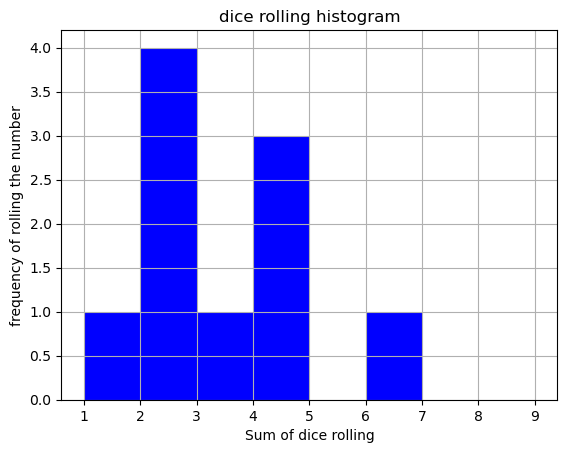

In [26]:
# your code here
bins = np.arange(1,10)
plt.hist(rolls, bins=bins, color="blue")
plt.grid(True)
plt.title("dice rolling histogram")
plt.xlabel("Sum of dice rolling")
plt.ylabel("frequency of rolling the number")

plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [40]:
# your code here
def freq(lst):
    d={}
    for i in lst:
        if d.get(i):
            d[i] += 1
        else:
            d[i] = 1
    return d
fre = freq(rolls)
fre_sort = dict(sorted(fre.items()))
fre_sort

{1: 1, 2: 4, 3: 1, 4: 3, 6: 1}

In [57]:
values = [] #in same order as traversing keys
keys = [] #also needed to preserve order
for key in fre_sort.keys():
  keys.append(key)
  values.append(fre_sort[key])
values = list(sorted(values))
values

[1, 1, 1, 3, 4]

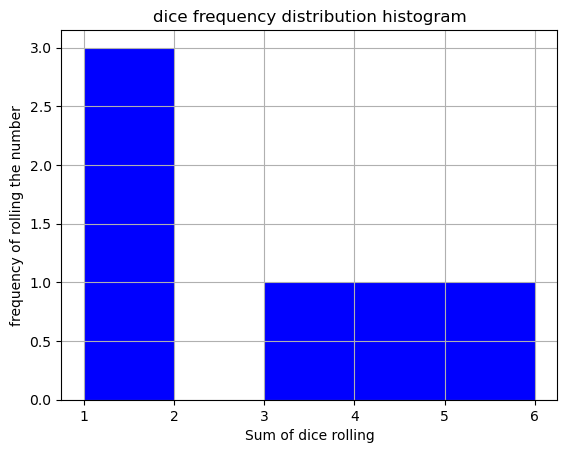

In [60]:
# your code here
bins = [1, 2, 3, 4, 5, 6]
plt.hist(values, keys, color="blue")
plt.grid(True)
plt.title("dice frequency distribution histogram")
plt.xlabel("Sum of dice rolling")
plt.ylabel("frequency of rolling the number")

plt.show()

In [ ]:
"""
your comments here
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [62]:
# your code here
def myfunc(observations):
    return sum(observations)/len(observations)
myfunc(rolls)

3.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [64]:
# your code here

#counting frequency of rolls list
d={}
for i in rolls:
    if d.get(i):
        d[i] += 1
    else:
        d[i] = 1
d

#calculating the mean from dictionary of frequencies
res = 0
for val in d.values():
    res+=val
res = res/len(d)

{1: 1, 6: 1, 2: 4, 4: 3, 3: 1}

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [65]:
# your code here
def median(lst):
    lst.sort()
    mid = len(lst) //2 
    return (lst[mid] + lst[~mid]) / 2 # ~ this operator flips positive number to negative
median(rolls)

2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [71]:
# your code here
def find_median(sorted_list):
    indices = []

    list_size = len(sorted_list)
    median = 0

    if list_size % 2 == 0:
        indices.append(int(list_size / 2) - 1)  # -1 because index starts from 0
        indices.append(int(list_size / 2))

        median = (sorted_list[indices[0]] + sorted_list[indices[1]]) / 2
        pass
    else:
        indices.append(int(list_size / 2))

        median = sorted_list[indices[0]]
        pass

    return median, indices
    pass

median, median_indices = find_median(rolls)
Q1, Q1_indices = find_median(rolls[:median_indices[0]])
Q3, Q3_indices = find_median(rolls[median_indices[-1] + 1:])

quartiles = [Q1, median, Q3]

print("(Q1, median = Q2, Q3): {}".format(quartiles))

(Q1, median = Q2, Q3): [2.0, 2.5, 4.0]


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [91]:
# your code here
roll = pd.read_csv('roll_the_dice_hundred.csv', index_col= None)
roll = roll.sort_values(by=['value'])
roll = roll[['roll', 'value']]

roll

,roll,value
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1
...,...,...
17,17,6
11,11,6
24,24,6
21,21,6


<AxesSubplot:xlabel='value', ylabel='roll'>

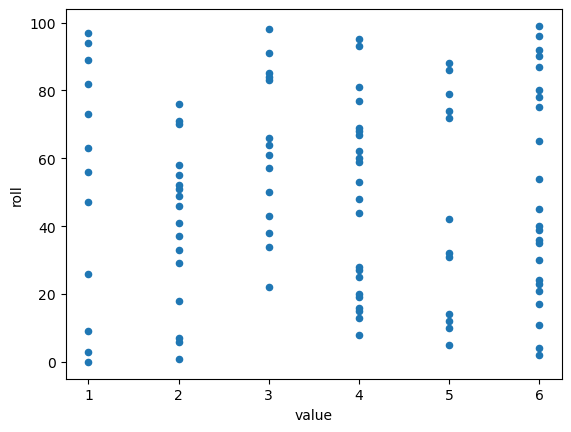

In [101]:
roll.plot(x='value', y='roll', kind='scatter')	 # kind  = scatter, line, bar 

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [102]:
# your code here
myfunc(roll['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [104]:
# your code here
freq2 = freq(roll['value'])
freq2

{1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [108]:
# your code here
values2 = [] #in same order as traversing keys
keys2 = [] #also needed to preserve order
for key in freq2.keys():
  keys2.append(key)
  values2.append(freq2[key])
values2 = list(sorted(values2))
values2, keys2

([12, 12, 14, 17, 22, 23], [1, 2, 3, 4, 5, 6])

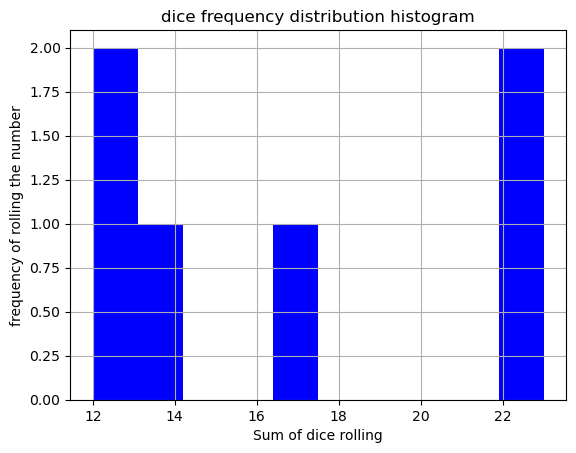

In [110]:
# your code here
plt.hist( values2, color="blue")
plt.grid(True)
plt.title("dice frequency distribution histogram")
plt.xlabel("Sum of dice rolling")
plt.ylabel("frequency of rolling the number")

plt.show()

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [112]:
# your code here
rolles = pd.read_csv('roll_the_dice_thousand.csv')
rolles = rolles.sort_values(by=['value'])
rolles = rolles[['roll', 'value']]

<AxesSubplot:xlabel='value', ylabel='roll'>

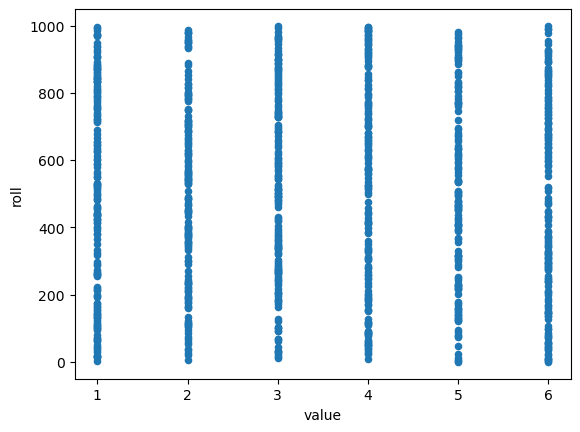

In [113]:
rolles.plot(x='value', y='roll', kind='scatter')	 # kind  = scatter, line, bar 

In [ ]:
"""
your comments here
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [156]:
# your code here
ages = pd.read_csv('ages_population.csv')
#rolles = rolles.sort_values(by=['value'])
#rolles = rolles[['roll', 'value']]
freq3 = freq(ages['observation'])

values3 = [] #in same order as traversing keys
keys3 = [] #also needed to preserve order
for key in freq3.keys():
  keys3.append(int(key))
  values3.append(int(freq3[key]))
values3 = list(sorted(values3))
keys3 = list(sorted(keys3))

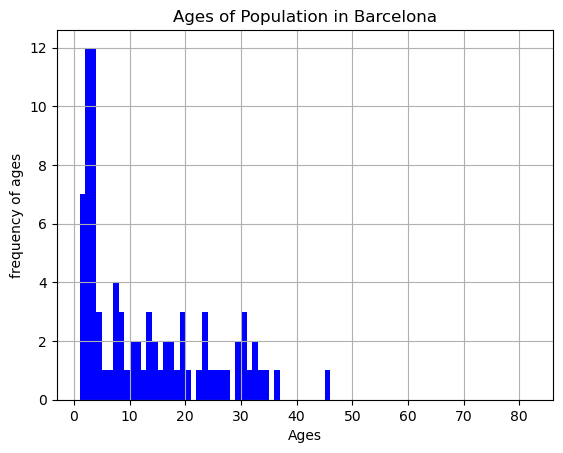

In [147]:
# your code here
plt.hist( values3, bins= keys3, color="blue")
plt.grid(True)
plt.title("Ages of Population in Barcelona")
plt.xlabel("Ages")
plt.ylabel("frequency of ages")

plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [150]:
# your code here
def mean(data):
  n = len(data)
  mean = sum(data) / n
  return mean

In [151]:
def variance(data):
   
  n = len(data)
   
  mean = sum(data) / n
   
  deviations = [(x - mean) ** 2 for x in data]
    
  variance = sum(deviations) / n
  return variance

In [152]:
def stdev(data):
  import math
  var = variance(data)
  std_dev = math.sqrt(var)
  return std_dev

In [154]:
mean_ages = mean(values3)
mean_ages

13.88888888888889

In [155]:
var_ages=variance(values3)
var_ages

125.07098765432102

In [153]:
st_dev_ages = stdev(values3)
st_dev_ages

11.183514101315428

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [163]:
# your code here
ages2 = pd.read_csv('ages_population2.csv')
freq4 = freq(ages2['observation'])

values4 = [] #in same order as traversing keys
keys4 = [] #also needed to preserve order
for key in freq4.keys():
  keys4.append(int(key))
  values4.append(int(freq4[key]))
values4 = list(sorted(values4))
keys4 = list(sorted(keys4))

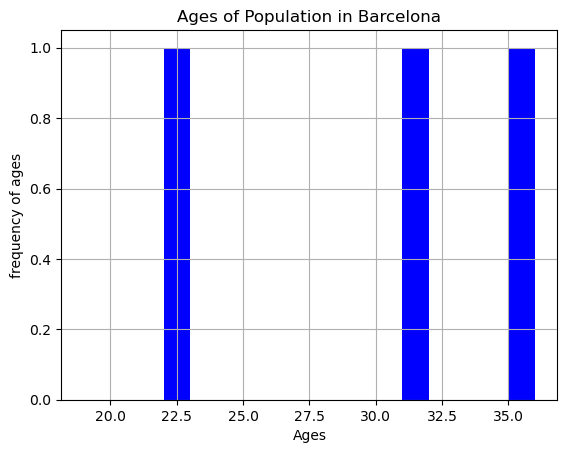

In [164]:
# your code here
plt.hist( values4, bins= keys4, color="blue")
plt.grid(True)
plt.title("Ages of Population in Barcelona")
plt.xlabel("Ages")
plt.ylabel("frequency of ages")

plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [166]:
# your code here
mean_ages2 = mean(values4)
mean_ages2

55.55555555555556

In [167]:
var_ages2 = variance(values4)
var_ages2

2189.135802469136

In [168]:
st_dev_ages2 = stdev(values4)
st_dev_ages2

46.78820153061171

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [169]:
# your code here
ages3 = pd.read_csv('ages_population3.csv')
freq5 = freq(ages3['observation'])

values5 = [] #in same order as traversing keys
keys5 = [] #also needed to preserve order
for key in freq5.keys():
  keys5.append(int(key))
  values5.append(int(freq5[key]))
values5 = list(sorted(values5))
keys5 = list(sorted(keys5))

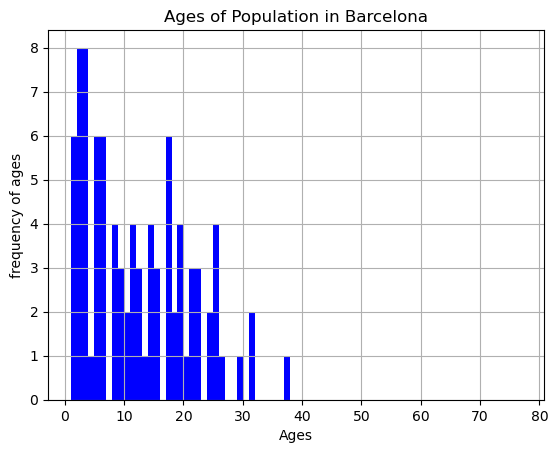

In [170]:
# your code here
plt.hist( values5, bins= keys5, color="blue")
plt.grid(True)
plt.title("Ages of Population in Barcelona")
plt.xlabel("Ages")
plt.ylabel("frequency of ages")

plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [171]:
# your code here
mean_ages3 = mean(values5)
st_dev_ages3 = stdev(values5)
mean_ages3, st_dev_ages3

(13.333333333333334, 8.667692247010672)

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [173]:
import numpy as np
 
Q1 = np.quantile(values5, 0.25)
Q2 = np.quantile(values5, 0.50)
Q3 = np.quantile(values5, 0.75)
 
print("Quartile 1 : ", Q1)
print("Quartile 2 : ", Q2)
print("Quartile 3 : ", Q3)
 
def QuartileDeviation(a, b):
    return (a - b)/2
print("Computed Result : ",QuartileDeviation(Q3, Q1))


Quartile 1 :  6.0
Quartile 2 :  13.0
Quartile 3 :  19.0
Computed Result :  6.5


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""